In [1]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
tqdm.pandas(desc='Progress')
import matplotlib.pylab as plt
%matplotlib inline
import gc

In [2]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')
print(df_train.shape, df_test.shape)

(200000, 202) (200000, 201)


In [3]:
private_lb = pd.read_csv("../input/Private_LB.csv")
public_lb = pd.read_csv("../input/Public_LB.csv")
synthetic = pd.read_csv("../input/synthetic_samples_indexes.csv")

private_lb = private_lb.rename(index=str, columns={"Private_LB": "index"})
public_lb = public_lb.rename(index=str, columns={"Public_LB": "index"})
synthetic = synthetic.rename(index=str, columns={"synthetic_samples_indexes": "index"})

true = public_lb.append(private_lb, ignore_index=True)
test_true = df_test.iloc[true["index"], :]
test_synthetic = df_test.iloc[synthetic["index"], :]

In [4]:
import seaborn as sns

In [5]:
from scipy.stats import boxcox

In [6]:
def processing(df, cols, add_0, add_1, no_add_1=True):
    
    total_cols = cols.copy()
    total_cols.append('ID_code')
    if (no_add_1):
        tmp = pd.concat([df[total_cols], add_0[total_cols]], axis=0)
    else:
        tmp = pd.concat([df[total_cols], add_0[total_cols], add_0[total_cols]], axis=0)
    size = tmp.shape[0]

    for var in cols:
        
        print(var)
        
        tmp_size = tmp.shape[0]
        #df_size = df.shape[0]
        
        #good = ['var_12', 'var_68', 'var_91', 'var_108', 'var_148']
        #if(var not in good):
            #tmp[var+"_new"] = tmp[var]
        #else:
            #binvalues = pd.cut(tmp[var], bins = 400, labels = range(400)).astype('float')
            #tmp[var+"_new"] = binvalues
        
        #tmp[var+'_count'] = tmp.groupby([var+"_new"])['ID_code'].transform('count')
        
        tmp[var+'_count'] = tmp.groupby([var])['ID_code'].transform('count')
        df[var+'_count'] = df.groupby([var])['ID_code'].transform('count')
        #tmp_max_ = tmp[var+'_count'].max()
        #tmp_min_ = tmp[var+'_count'].min()
        #df_max_ = df[var+'_count'].max()
        #df_min_ = df[var+'_count'].min()
        
        #df[var+'_count'] = df[var+'_count'].apply(lambda x:min((abs(x-df_max_)/(df_max_-df_min_)),\
                                                  #(abs(x-df_min_)/(df_max_-df_min_))))
            
        
        #tmp[var+'_count'] = tmp[var+'_count'].apply(lambda x:min((abs(x-tmp_max_)/(tmp_size)),\
                                                  #(abs(x-tmp_min_)/(tmp_size))))
        df[var+'_count'] = abs(df[var+'_count'] - tmp.iloc[:df.shape[0]][var+'_count'])/tmp_size
        
    return df

def processing_new(df, cols, add_0, add_1, no_add_1=True):
    
    total_cols = cols.copy()
    total_cols.append('ID_code')
    
    #tmp_0 = pd.concat([df[total_cols], add_0[total_cols], add_0[total_cols]], axis=0)
    tmp_1 = pd.concat([df[total_cols], add_0[total_cols]], axis=0)
    #tmp_2 = pd.concat([df[total_cols], add_1[total_cols]], axis=0)
    #size_0 = tmp_0.shape[0]
    size_1 = tmp_1.shape[0]
    #size_2 = tmp_2.shape[0]
    size_df = df.shape[0]

    for var in cols:
        
        print(var)
        
        #tmp_0[var+'_count'] = tmp_0.groupby([var])['ID_code'].transform('count')
        tmp_1[var+'_count'] = tmp_1.groupby([var])['ID_code'].transform('count')
        #tmp_2[var+'_count'] = tmp_2.groupby([var])['ID_code'].transform('count')
        df[var+'_count'] = df.groupby([var])['ID_code'].transform('count')
       
        df[var+'_count'] = (df[var+'_count']/size_df)/(tmp_1.iloc[:df.shape[0]][var+'_count']/size_1)
        
        
        #df = df.drop(var+'_count_tmp', axis=1)
        
    return df


In [7]:
important = [c for c in df_train.columns if c not in ['ID_code', 'target']]

In [8]:
df_train = processing(df_train, important, test_true, test_synthetic, True)

var_0
var_1
var_2
var_3
var_4
var_5
var_6
var_7
var_8
var_9
var_10
var_11
var_12
var_13
var_14
var_15
var_16
var_17
var_18
var_19
var_20
var_21
var_22
var_23
var_24
var_25
var_26
var_27
var_28
var_29
var_30
var_31
var_32
var_33
var_34
var_35
var_36
var_37
var_38
var_39
var_40
var_41
var_42
var_43
var_44
var_45
var_46
var_47
var_48
var_49
var_50
var_51
var_52
var_53
var_54
var_55
var_56
var_57
var_58
var_59
var_60
var_61
var_62
var_63
var_64
var_65
var_66
var_67
var_68
var_69
var_70
var_71
var_72
var_73
var_74
var_75
var_76
var_77
var_78
var_79
var_80
var_81
var_82
var_83
var_84
var_85
var_86
var_87
var_88
var_89
var_90
var_91
var_92
var_93
var_94
var_95
var_96
var_97
var_98
var_99
var_100
var_101
var_102
var_103
var_104
var_105
var_106
var_107
var_108
var_109
var_110
var_111
var_112
var_113
var_114
var_115
var_116
var_117
var_118
var_119
var_120
var_121
var_122
var_123
var_124
var_125
var_126
var_127
var_128
var_129
var_130
var_131
var_132
var_133
var_134
var_135
var_136
var_137
var_13

In [9]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190_count,var_191_count,var_192_count,var_193_count,var_194_count,var_195_count,var_196_count,var_197_count,var_198_count,var_199_count
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,0.000000,0.000007,0.000007,0.000003,0.000017,0.000003,0.000007,0.000003,0.000000,0.000000
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,0.000010,0.000003,0.000010,0.000003,0.000010,0.000007,0.000007,0.000027,0.000013,0.000003
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,0.000003,0.000003,0.000010,0.000003,0.000000,0.000000,0.000000,0.000013,0.000007,0.000000
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,0.000003,0.000003,0.000007,0.000000,0.000003,0.000003,0.000003,0.000000,0.000000,0.000000
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,0.000000,0.000013,0.000000,0.000000,0.000000,0.000013,0.000007,0.000010,0.000000,0.000000


In [10]:
y_train = df_train['target']

train0 = df_train[y_train.values==0].copy()
train1 = df_train[y_train.values==1].copy()

In [11]:
def plot_hist_target(df, feature):
    negData = df.loc[df['target'] == 0][feature]
    posData = df.loc[df['target'] == 1][feature]

    fig, ax = plt.subplots(ncols = 1, figsize=(20,5))

    fig.suptitle(feature)
    outs1, outs2, outs3 = ax.hist([negData, posData], 
                                  bins=50, 
                                  density = True, 
                                  histtype='step', 
                                  label=("target 0", "target 1"),
                                  linewidth=3)
    ax.set_xticks(outs2)
    ax.xaxis.grid(True)
    handles, labels=ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    fig.show()
    plt.show()

/home/jionie/py3env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


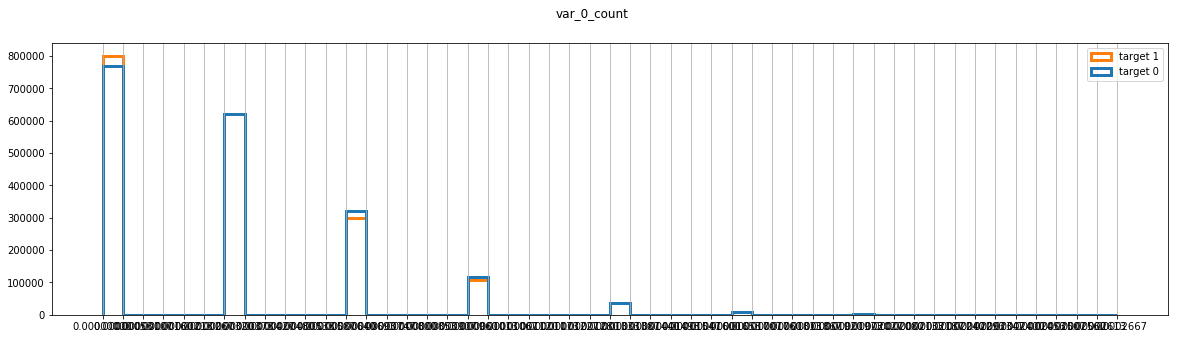

In [29]:
plot_hist_target(df_train, 'var_0_count')

In [13]:
def plot_hist(df_1, df_2, feature):
    negData = df_1[feature]
    posData = df_2[feature]
    
    fig, ax = plt.subplots(ncols = 1, figsize=(20,5))

    fig.suptitle(feature)
    outs1, outs2, outs3 = ax.hist([negData, posData], 
                                  bins=50, 
                                  density = True, 
                                  histtype='step', 
                                  linewidth=3)
    ax.set_xticks(outs2)
    ax.xaxis.grid(True)

    fig.show()
    plt.show()

/home/jionie/py3env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


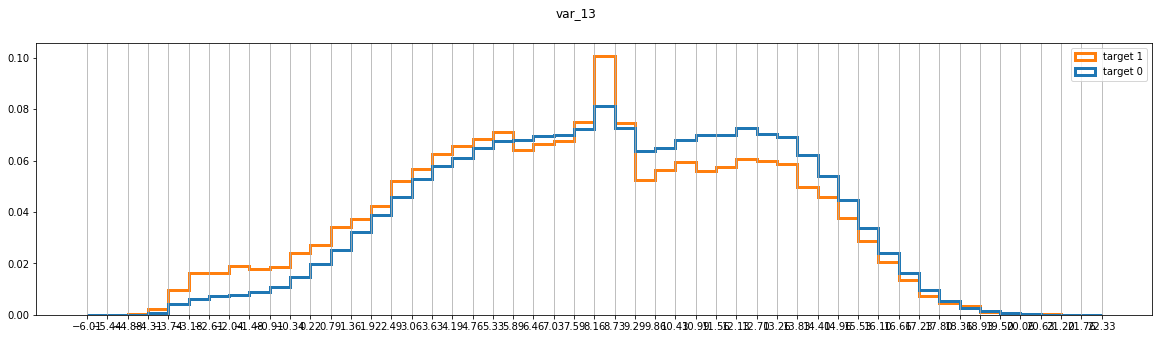

In [14]:
plot_hist_target(df_train, 'var_13')

/home/jionie/py3env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


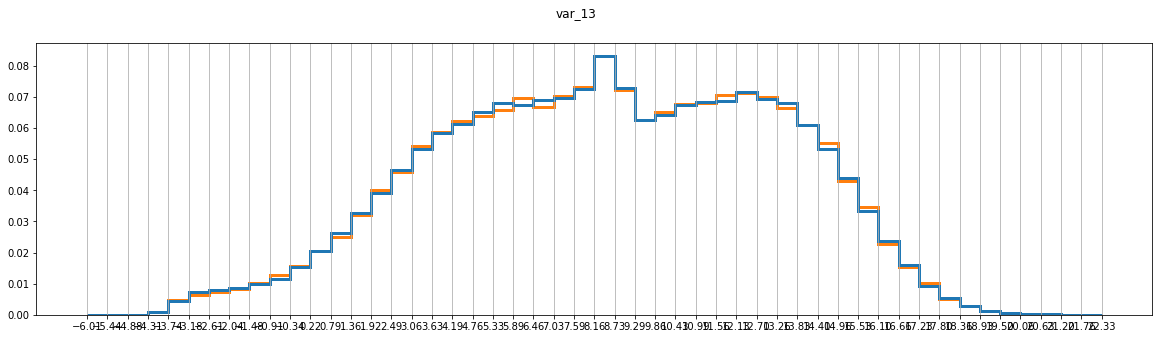

In [15]:
plot_hist(df_train, df_test, 'var_13')

In [16]:
features = ['var_' + str(i) for i in range(200)]

tmp_0 = pd.concat([df_train[features], test_true[features], test_synthetic[features]], axis=0)
tmp_1 = pd.concat([df_train[features], test_true[features]], axis=0)
tmp_2 = pd.concat([df_train[features], test_synthetic[features]], axis=0)

/home/jionie/py3env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


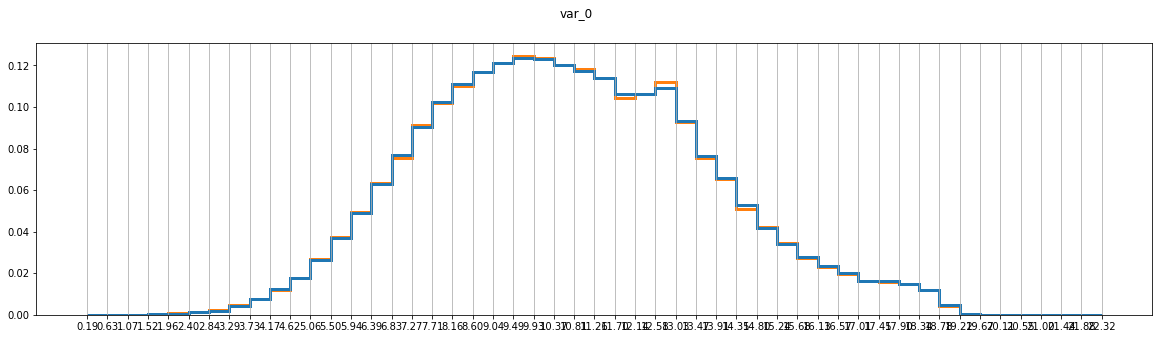

In [17]:
plot_hist(df_train, tmp_0, 'var_0')

/home/jionie/py3env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


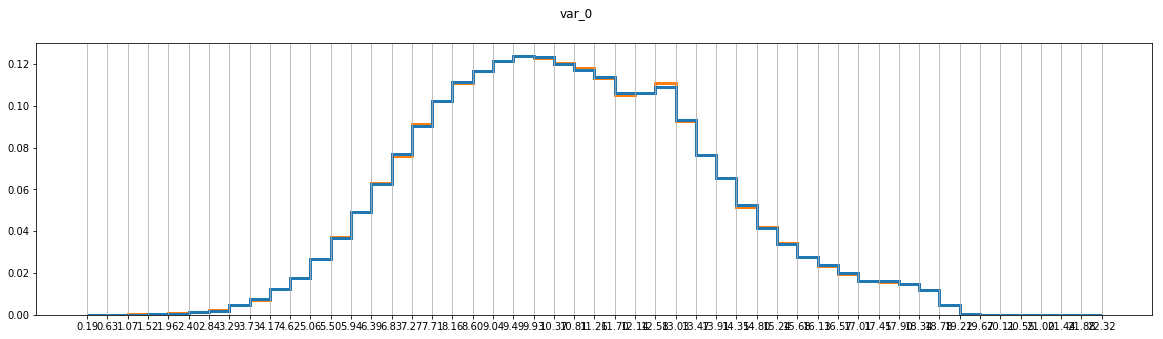

In [18]:
plot_hist(df_train, tmp_1, 'var_0')

/home/jionie/py3env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


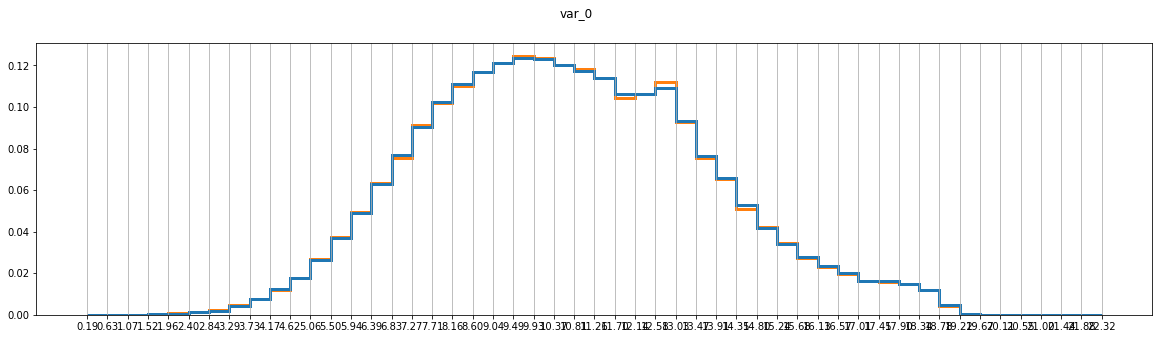

In [19]:
plot_hist(df_train, tmp_0, 'var_0')

/home/jionie/py3env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


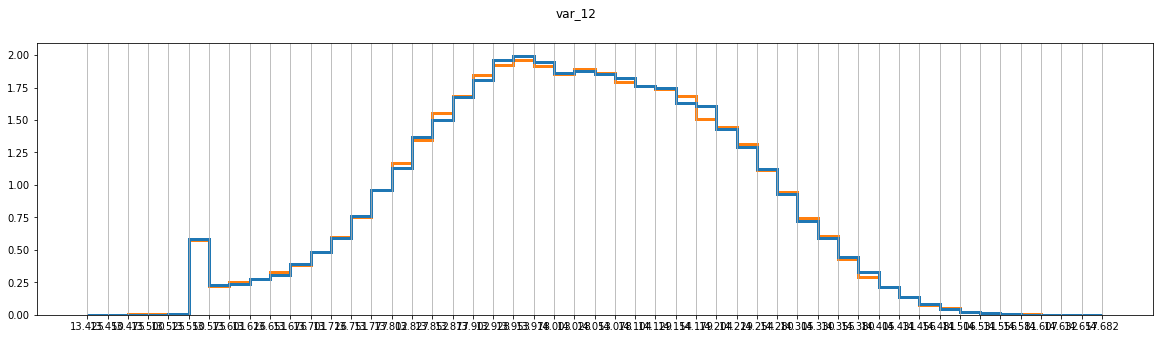

In [20]:
plot_hist(df_train, test_true, 'var_12')

In [21]:
print(df_train['var_0_count'].value_counts())

0.000000    82346
0.000003    66233
0.000007    33916
0.000010    12378
0.000013     4027
0.000017      886
0.000020      175
0.000023       34
0.000027        5
Name: var_0_count, dtype: int64


In [22]:
df_train['var_12_bin'] = pd.cut(df_train['var_12'], bins = 400, labels = range(400)).astype('float')

/home/jionie/py3env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


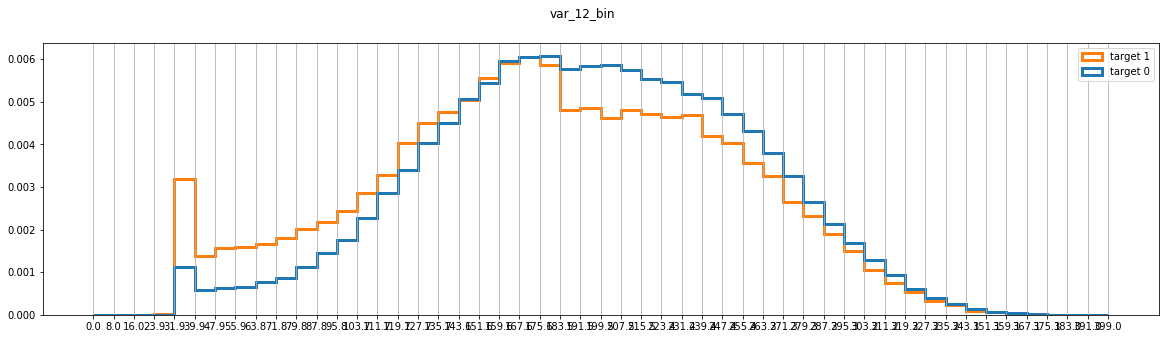

In [23]:
plot_hist_target(df_train, 'var_12_bin')

/home/jionie/py3env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


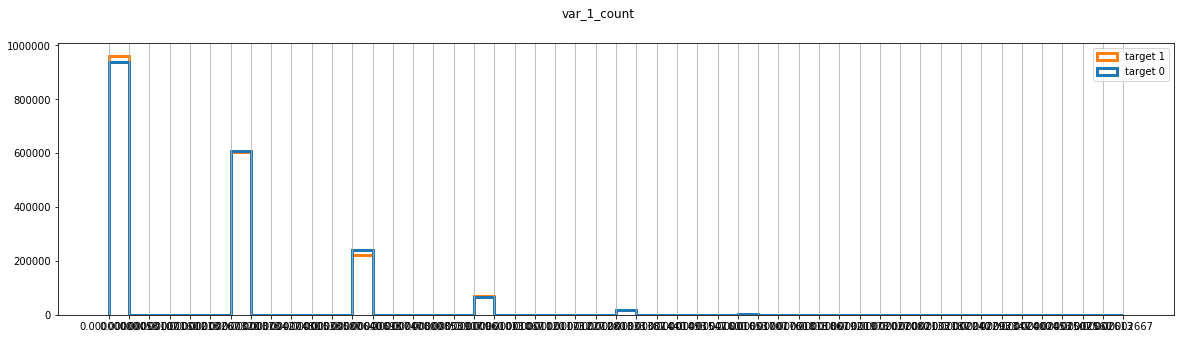

In [24]:
plot_hist_target(df_train, 'var_1_count')

In [25]:
grouped = df_train.groupby(by=['var_0']) 
df_train['count_var_12'] = grouped['var_12'].transform(lambda x: x.count())

/home/jionie/py3env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


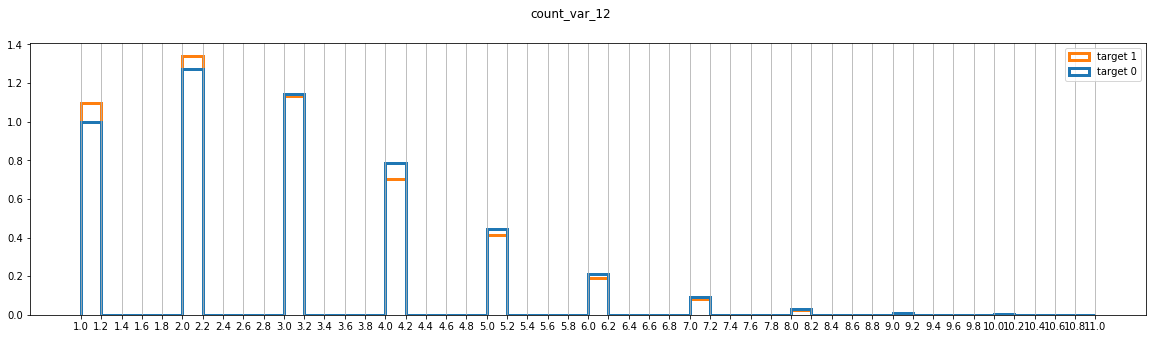

In [26]:
plot_hist_target(df_train, 'count_var_12')

/home/jionie/py3env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


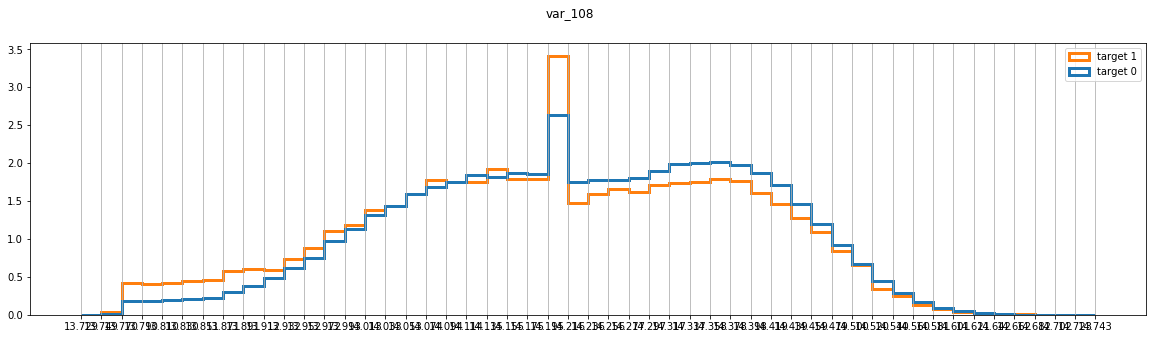

In [27]:
plot_hist_target(df_train, 'var_108')

In [28]:
for i in range(200):
    print(i, np.unique(df_train['var_'+str(i)].value_counts()).shape[0])

0 11
1 10
2 12
3 14
4 15
5 7
6 22
7 11
8 11
9 18
10 9
11 8
12 77
13 9
14 12
15 33
16 14
17 8
18 9
19 7
20 9
21 9
22 11
23 31
24 10
25 41
26 9
27 15
28 24
29 12
30 6
31 14
32 12
33 10
34 29
35 10
36 12
37 13
38 9
39 10
40 8
41 8
42 23
43 39
44 9
45 7
46 12
47 7
48 8
49 9
50 25
51 7
52 10
53 24
54 8
55 9
56 10
57 22
58 10
59 21
60 10
61 6
62 13
63 11
64 16
65 10
66 18
67 8
68 319
69 10
70 7
71 45
72 10
73 8
74 7
75 10
76 8
77 10
78 15
79 17
80 8
81 14
82 8
83 8
84 8
85 10
86 8
87 9
88 12
89 11
90 7
91 66
92 10
93 30
94 11
95 26
96 7
97 7
98 27
99 15
100 7
101 9
102 8
103 58
104 15
105 23
106 15
107 9
108 88
109 11
110 10
111 19
112 15
113 10
114 19
115 13
116 15
117 6
118 9
119 11
120 7
121 15
122 9
123 9
124 11
125 40
126 44
127 11
128 11
129 10
130 21
131 31
132 16
133 39
134 9
135 8
136 6
137 8
138 10
139 8
140 9
141 9
142 8
143 11
144 20
145 10
146 13
147 9
148 58
149 8
150 13
151 10
152 11
153 14
154 9
155 9
156 20
157 9
158 7
159 9
160 7
161 52
162 16
163 9
164 9
165 10
166 37
167 